In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    resPath = extSSDpath + getProjectFoldername() + '/LES_lattice/'
else:
    resPath = ''

def get_resFolderName(sizeL, q1, q2):
    return f'L{sizeL}_q1_{int(q1)}_q2_{int(q2)}_intensive_check/'

def get_fileName(sizeL, l):
    # falpha_LX64LY64_Q3_lambda_0.4000_p0_0.0000_p1_0.0000_pkm1_0.0000_pk_0.0000_q0_1.0000_q1_10.0000_qkm1_10.0000_qk_10.0000
    lstr = str(l).ljust(len(str(l)) + 4 - len(str(l).split('.')[1]), '0')
    name = f'falpha_LX{sizeL}LY{sizeL}_Q3_lambda_{lstr}_p0_0.0000_p1_0.0000_pkm1_0.0000_pk_0.0000_q0_1.0000_q1_10.0000_qkm1_10.0000_qk_10.0000.dat'
    return name

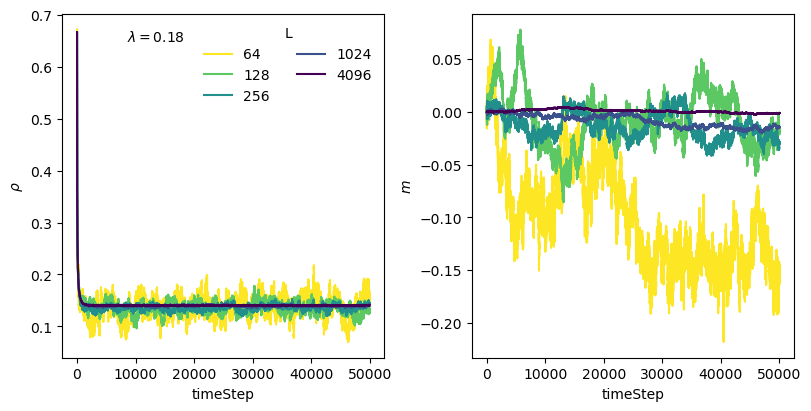

In [45]:
# l = 0.4000
# l = 0.1990
l = 0.18
q1, q2 = 10.0, 10.0
sizeLs = [64, 128, 256, 1024, 4096]
colors = plt.cm.viridis_r(np.linspace(0,1,len(sizeLs)))

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,4))
ax[0].set(xlabel='timeStep', ylabel=r'$\rho$')
ax[1].set(xlabel='timeStep', ylabel=r'$m$')

for sizeL,c in zip(sizeLs,colors):
    fileName = resPath + get_resFolderName(sizeL, q1, q2) + get_fileName(sizeL, l)
    data = np.loadtxt(fileName)
    rho, m = data[:,2] + data[:,3], data[:,2] - data[:,3]
    ax[0].plot(data[:,0], rho, color=c, label=sizeL)
    ax[1].plot(data[:,0], m, color=c)

ax[0].legend(title='L', frameon=False, ncol=2)
rho_theo = 1 - 0.1/l
# ax[0].axhline(rho_theo, 0, 1, ls='--', color='xkcd:black')
# ax[1].axhline(rho_theo, 0, 1, ls='--', color='xkcd:black')
# ax[1].axhline(-rho_theo, 0, 1, ls='--', color='xkcd:black')
ax[0].text(0.2, 0.92, rf'$\lambda = {l}$', transform=ax[0].transAxes)

fig.savefig(f'time_evo_rhom_l_{l}_many_sizeL.png')


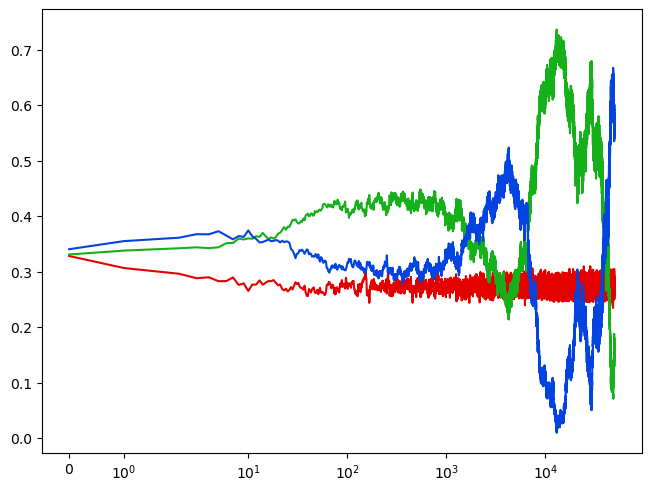

In [27]:
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.set_xscale('symlog')
ax.plot(data[:,0], data[:,1], color='xkcd:red')
ax.plot(data[:,0], data[:,2], color='xkcd:green')
ax.plot(data[:,0], data[:,3], color='xkcd:blue')